# 1. Import Dependencies and Data

In [ ]:
!pip install tensorflow-datasets ipywidgets

In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
gpus

In [1]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [2]:
ds = tfds.load('fashion_mnist', split='train')

In [3]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [5]:
ds.as_numpy_iterator().next()['label']

2

In [4]:
ds.take(1)

<_TakeDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

# 2. Vis Data and Build Dataset

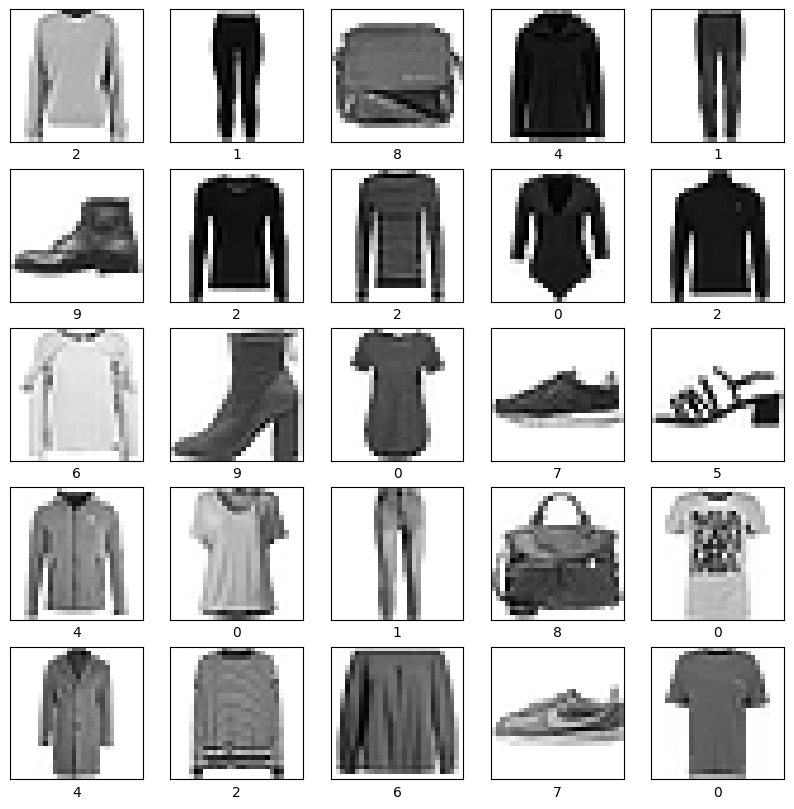

In [9]:
import numpy as np

dataIterator = ds.as_numpy_iterator()
def get_images_and_labels(dataIterator, num_samples=25):
    images = []
    labels = []
    for _ in range(num_samples):
        data = dataIterator.next()
        images.append(data['image'])
        labels.append(data['label'])
    return np.array(images), np.array(labels)
images, labels = get_images_and_labels(dataIterator, 25)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(labels[i])

In [10]:
def scale_images(data):
    image = data['image']
    return image/ 255

In [15]:
ds = tfds.load('fashion_mnist', split='train')      # Load the Fashion MNIST training dataset (60,000 images)
ds = ds.map(scale_images)                           # Apply image scaling (e.g., normalize pixel values to 0–1)
ds = ds.cache()                                     # Cache data in memory or disk after preprocessing
ds = ds.shuffle(60000)                              # Randomly shuffle the dataset with buffer size = 60,000
ds = ds.batch(128)                                  # Group the dataset into batches of 128 samples
ds = ds.prefetch(64)                                # Prefetch 64 batches asynchronously to improve performance


In [16]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# 3. Build Neural Network

### 3.1 Import Modeling Component

### 3.2 Build Generator

### 3.3 Build Descriminator

# 4. Construct Training Loop

### 4.1 Setup Losses and Optimization

### 4.2 Build Subclassed Model

### 4.3 Train

##